In [72]:
import pygrib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from icedef import metocean

In [13]:
grbs = pygrib.open('/home/evankielley/Downloads/ofs_atl.t00z.N000.20150420.3d.grb.grib2')

In [14]:
for grb in grbs[:2]:
    print(grb)

RuntimeError: b'Key/value not found'

In [10]:
grbs

AttributeError: 'pygrib.open' object has no attribute 'keys'

In [46]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.read_csv('/home/evankielley/Downloads/eng-hourly-04012015-04302015.csv', 
                  usecols=['Date/Time', 'Wind Spd (km/h)', 'Wind Dir (10s deg)'], skiprows=15)

In [47]:
df['Wind Dir (deg)'] = df['Wind Dir (10s deg)'] * 10
df['Wind Spd (m/s)'] = df['Wind Spd (km/h)'] * (1000 / 3600)
df['Wind Dir (rad)'] = np.deg2rad(df['Wind Dir (deg)'])
df['eastward_wind_velocity'] =  -df['Wind Spd (m/s)'] * np.sin(df['Wind Dir (rad)'])
df['northward_wind_velocity'] =  -df['Wind Spd (m/s)'] * np.cos(df['Wind Dir (rad)'])

In [48]:
df

,Date/Time,Wind Dir (10s deg),Wind Spd (km/h),Wind Dir (deg),Wind Spd (m/s),Wind Dir (rad),eastward_wind_velocity,northward_wind_velocity
0,2015-04-01 00:30,19,21,190,5.833,3.316,1.013,5.745
1,2015-04-01 01:30,22,25,220,6.944,3.840,4.464,5.320
2,2015-04-01 02:30,21,21,210,5.833,3.665,2.917,5.052
3,2015-04-01 03:30,23,37,230,10.278,4.014,7.873,6.606
4,2015-04-01 04:30,24,43,240,11.944,4.189,10.344,5.972
5,2015-04-01 05:30,25,48,250,13.333,4.363,12.529,4.560
6,2015-04-01 06:30,26,37,260,10.278,4.538,10.122,1.785
7,2015-04-01 07:30,26,37,260,10.278,4.538,10.122,1.785
8,2015-04-01 08:30,26,42,260,11.667,4.538,11.489,2.026
9,2015-04-01 09:30,25,43,250,11.944,4.363,11.224,4.085


In [50]:
start_date = np.datetime64('2015-04-19')
end_date = np.datetime64('2015-04-20')
date_bounds = start_date, end_date
atm = metocean.NARRAtmosphere(date_bounds)

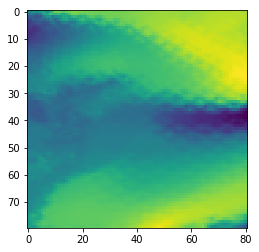

In [52]:
plt.imshow(atm.eastward_wind_velocities[0, :, :])

In [60]:
index = 450
df['Date/Time'][index]

'2015-04-19 18:30'

In [67]:
time = np.datetime64(df['Date/Time'][index])
latitude, longitude = 47.6212, -52.7424  # St. John's International Airport
observed_eastward_wind_velocity = df['eastward_wind_velocity'][index]
observed_northward_wind_velocity = df['northward_wind_velocity'][index]

In [68]:
atm.eastward_wind_velocities.interp(time=time, latitude=latitude, longitude=longitude).values

array(-2.02620063)

In [69]:
observed_eastward_wind_velocity

-3.194444444444444

In [70]:
atm.northward_wind_velocities.interp(time=time, latitude=latitude, longitude=longitude).values

array(-6.55961119)

In [71]:
observed_northward_wind_velocity

-5.5329400797339146